<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Clase 04: Métricas y selección de modelos

## Objetivos

* Estimar el error al aplicar uno o varios modelos a los datos.
* Conocer algunas métricas utilizadas en Machine Learning

## Contenidos
* [Holdout Set](#holdout)
* [Validación Cruzada](#cross_validation)
* [Métricas](#metrics)

<a id='holdout'></a>

## Holdout Set

### Motivación

Resulta imposible conocer a priori que modelo explicará de mejor manera un cierto conjunto de datos. Las técnicas de Holdout Set (y Cross Validation) permiten estimar el error que posee el modelo.

### Problema: Abalone Dataset

Los datos Abalone Dataset corresponden a medidas físicas de abulones u orejas marinas (abalones), una especia de lapa o caracol marino comestibles. Este set de datos fue descrito por Sam Waugh para su tesis de doctorado, en la cual utilizó los datos para ilustrar el comportamiento de algoritmos de clasificación. Desde entonces, se ha utilizado para verificar algoritmos de clasificación y regresión.

<img src="images/abalone.jpg" alt="" width="600px" align="middle"/>

La base de datos contiene mediciones a 4177 abalones, donde las mediciones posibles son sexo ($S$), peso entero $W_1$, peso sin concha $W_2$, peso de visceras $W_3$, peso de concha  $W_4$, largo ($L$), diametro $D$, altura $H$, y el número de anillos $A$. 

Buscaremos **predecir el número de anillos**, utilizando las otras variables.

### Modelos propuestos

Los modelos propuestos son los siguientes:

#### Modelo A
Consideramos 9 parámetros, llamados $\alpha_i$, para el siguiente modelo:
$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

#### Modelo B
Consideramos 6 parámetros, llamados $\beta_i$, para el siguiente modelo:
$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

#### Modelo C
Consideramos 12 parámetros, llamados $\theta_i^{k}$, con $k \in \{M, F, I\}$, para el siguiente modelo:

Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$

Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$

Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$

***¿Cómo podríamos de manera científica saber cuál de los modelos planteados representa de mejor manera al conjunto de datos?***

### Datos

In [3]:
!head data/abalone.data

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [21]:
# !cat data/abalone.names

In [11]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import altair as alt

alt.themes.enable('opaque')  # Para quienes utilizan temas oscuros en Jupyter Lab
# %matplotlib inline

ThemeRegistry.enable('opaque')

In [28]:
abalone = pd.read_csv(
    "data/abalone.data",
    header=None,
    names=["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
)

abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


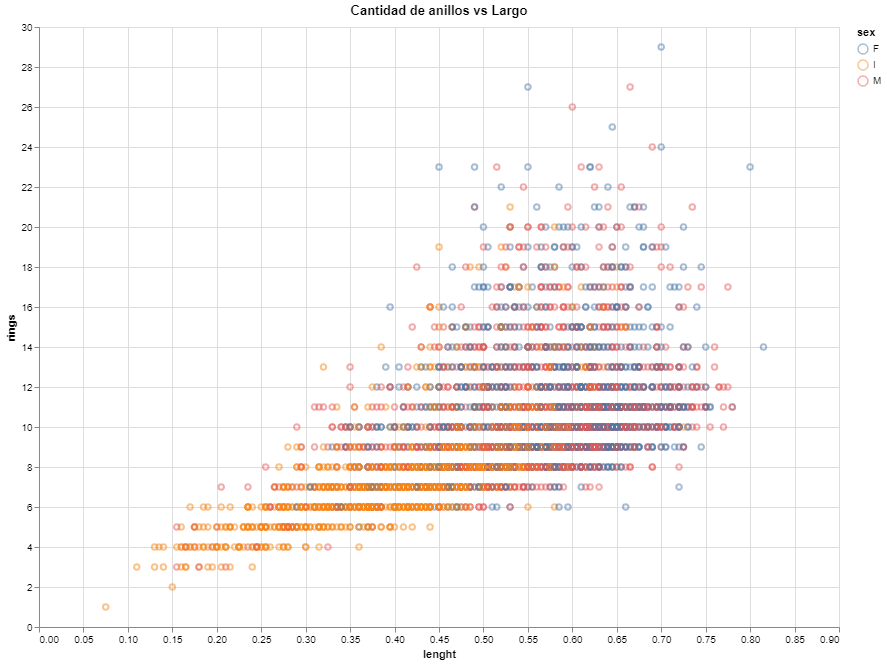

In [19]:
alt.Chart(abalone).mark_point(opacity=0.5).encode(
    x="lenght",
    y="rings",
    color="sex"
).properties(
    width=800,
    height=600,
    title="Cantidad de anillos vs Largo"
)

<a id='cross_validation'></a>

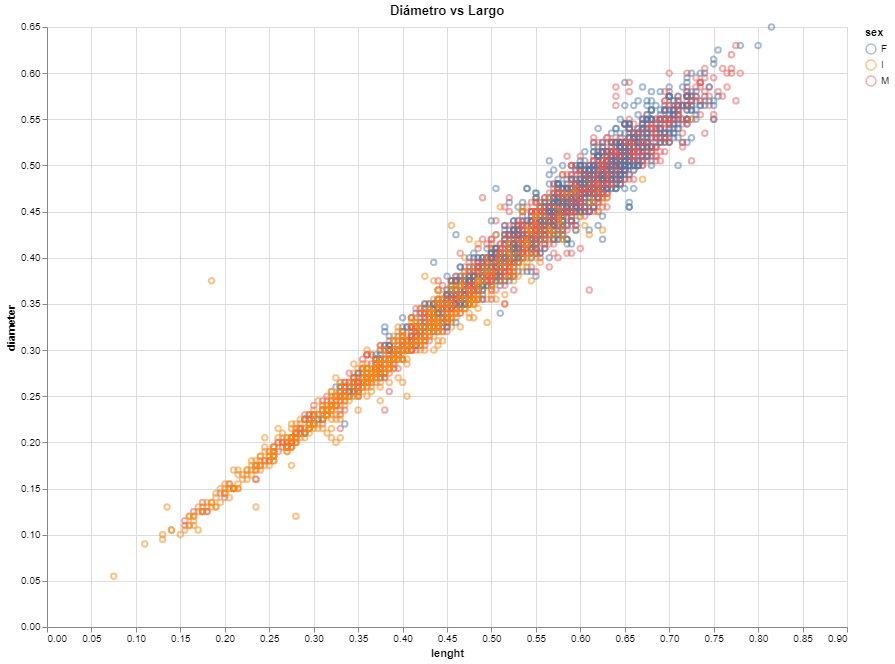

In [22]:
alt.Chart(abalone).mark_point(opacity=0.5).encode(
    x="lenght",
    y="diameter",
    color="sex"
).properties(
    width=800,
    height=600,
    title="Diámetro vs Largo"
)

### Teoría Holdout Set

La técnica del holdout set separa los datos en 2 grupos.
* El primero de los grupos permitirá entrenar el modelo y obtener los parámetros del modelo.
* El segundo de los grupos se utilizará obtener una estimación del error (predictivo) del modelo.

<img src="images/HoldoutSet.png" alt="" width="600px" align="middle"/>

#### Características

* Típicamente se separa el 30 % de los datos para el testeo del modelo.
* Esto significa que el modelo se entrena en un conjunto menor de datos, y por tanto el modelo no será tan bueno como si se entrenara en el conjunto completo de datos.
* El modelo se entrena en el conjunto de Training, sin utilizar ningun ejemplo del conjunto de datos Test.
* El evaluar el modelo entrenado en los datos del conjunto de Test, el modelo se está aplicando por primera vez en esos datos, y por tanto, la estimación del error no continene bias.

**Importante**

* El procedimiento estándar es reportar el error entregado en el set de predicción, pero luego volver a entregar el modelo utilizando todos los datos simultáneamente. La partición Training-Test se realiza para tener una estimación del error.
* El error reportado es una estimación conservativa, puesto que al entrenar en todos los datos el error del modelo actual típicamente disminuirá... ¡pero ya no tenemos datos para hacer una mejor estimación!
* Predicciones conservativas son mejores que predicciones optimistas.

### Implementación

La implementación numérica del holdout set no depende del modelo a ajustar: puede realizarse para regresion lineal o logística, modelos discretos, y cualquier otro algoritmos de machine learning, etc.

Los pasos son:
1. Realizar la partición en datos de entrenamiento y de predicción.
2. Obtener los coeficientes del modelo utilizando los datos de entrenamiento.
3. Utilizar el modelo entrenado para realizar predicción de datos en el set de predicción.
4. Comparar la predicción realizada con los datos reales (conocidos en el set de predicción), para estimar el error de predicción.
5. Obtener los coeficientes del modelo todos los datos de entrenamiento.

En general la fórmula del error a calcular viene dado de manera natural por el tipo de problema y modelo utilizado. No siempre es el mismo.

### Ejemplo con datos sintéticos

Ilustraremos el funcionamiento del método con datos sintéticos:
$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo
$$ y(x) = a \cos \Big( b x + c\Big) + d$$
minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE (Root Mean Square Error):
$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$
El RMSE corresponde a la desviación estándar de los residuos.

Prediction error estimated on 1.0607 
The obtained model parameters for training dataset are:
	(a,b,c,d) = (5.659, 0.762, 0.006, -0.329)
The obtained model parameters for the whole dataset are:
	(a,b,c,d) = (5.728, 0.752, 0.014, -0.322)
The true model parameters are:
	(a,b,c,d) = (5.000, 0.785, 0.000, 0.000)

Conservative error estimation on testing dataset: 1.06
Pure random error on testing dataset: 1.11
Pure random error on all data: 1.04


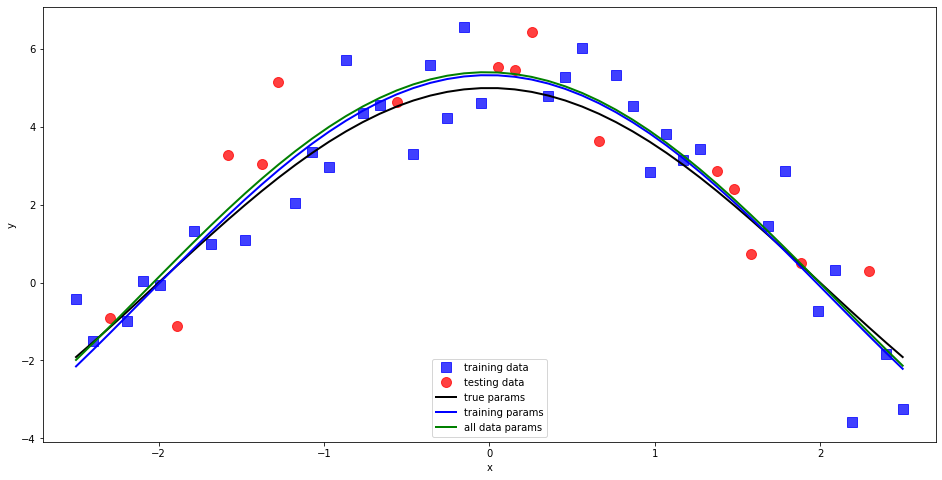

In [24]:
import model  # Local model.py

# Load data
filenames = ["dataN50.txt", "dataN500.txt", "dataN5000.txt"]
i = 0  # use 0, 1 or 2
data = model.load_data(f"data/{filenames[i]}")
N = data.shape[0]
split = int(0.7*N)   # Change here

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Do the split
training_data = data[:split,:]
testing_data = data[split:,:]

# Train model excluding the holdout set
training_params = model.get_params(training_data)

# Test with the holdout set
prediction_error = model.get_error(training_params, testing_data)
print("Prediction error estimated on {:.5} ".format(prediction_error))

# Train model with all the data
all_data_params = model.get_params(data)

# Report
model.full_report(training_data, testing_data, training_params, all_data_params)

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

### Entrenando y testeando los modelos para los datos Abalone

A continuación se entrega el código necesario para entrenar los distintos modelos y realizar una predicción. 
Se proveen ejemplos de utilización.

In [29]:
abalone_data = abalone.assign(sex=lambda x: x["sex"].map({"M": 1, "I": 0, "F": -1}))
abalone_data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Modelo A**

$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

In [41]:
# data = abalone_data.copy()

In [39]:
def train_model_A(data):
    y = np.log(data.loc[:, "rings"].values.flatten())
    X = (
        data.assign(
            intercept=1.,
            length=lambda x: x["length"].apply(np.log),
            diameter=lambda x: x["diameter"].apply(np.log),
            height=lambda x: x["height"].apply(np.log),
        )
        .drop(columns=["rings"])
        .values
    )
    coeffs = np.linalg.lstsq(X, y)
    return coeffs

# Testeando el modelo A
def test_model_A(data, coeffs):
    X = data.copy()
    X[:,0] = 1.0
    X[:,1:4] = np.log(X[:,1:4])
    ln_anillos = np.dot(X, coeffs)
    return np.exp(ln_anillos)

In [40]:
train_model_A(abalone_data)

/home/alonsolml/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


ValueError: On entry to DLASCL parameter number 4 had an illegal value

## Validación Cruzada

<a id='metrics'></a>

## Métricas